서울시 지하철호선별 역별 승하차 인원 정보

요일별 이용패턴, 혼잡도 분석
총 19139 건의 데이터

In [89]:
# 데이터 불러오기
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/CARD_SUBWAY_MONTH_202505.csv", index_col=False)  # 파일명은 상황에 맞게 수정

# 기본 정보 확인
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19139 entries, 0 to 19138
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    19139 non-null  int64 
 1   노선명     19139 non-null  object
 2   역명      19139 non-null  object
 3   승차총승객수  19139 non-null  int64 
 4   하차총승객수  19139 non-null  int64 
 5   등록일자    19139 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 897.3+ KB


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20250501,분당선,야탑,17571,18765,20250504
1,20250501,8호선,석촌,6970,8042,20250504
2,20250501,분당선,서현,16548,17173,20250504
3,20250501,경부선,독산,8851,8507,20250504
4,20250501,경부선,수원,35103,38426,20250504


In [90]:
df['사용일자'] = pd.to_datetime(df['사용일자'], format='%Y%m%d')
df['등록일자'] = pd.to_datetime(df['등록일자'], format='%Y%m%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19139 entries, 0 to 19138
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   사용일자    19139 non-null  datetime64[ns]
 1   노선명     19139 non-null  object        
 2   역명      19139 non-null  object        
 3   승차총승객수  19139 non-null  int64         
 4   하차총승객수  19139 non-null  int64         
 5   등록일자    19139 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 897.3+ KB


In [93]:
df['요일'] = df['사용일자'].dt.day_name()

In [92]:
df.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일
0,2025-05-01,분당선,야탑,17571,18765,2025-05-04,Thursday
1,2025-05-01,8호선,석촌,6970,8042,2025-05-04,Thursday
2,2025-05-01,분당선,서현,16548,17173,2025-05-04,Thursday
3,2025-05-01,경부선,독산,8851,8507,2025-05-04,Thursday
4,2025-05-01,경부선,수원,35103,38426,2025-05-04,Thursday


In [94]:
요일_매핑 = {
    'Monday': '월', 'Tuesday': '화', 'Wednesday': '수',
    'Thursday': '목', 'Friday': '금', 'Saturday': '토', 'Sunday': '일'
}
df['요일'] = df['사용일자'].dt.day_name().map(요일_매핑)
요일별_데이터 = {요일: group.reset_index(drop=True) for 요일, group in df.groupby('요일')}
print(요일별_데이터['화'].head())

        사용일자  노선명  역명  승차총승객수  하차총승객수       등록일자 요일
0 2025-05-06  경인선  인천    5642    4676 2025-05-09  화
1 2025-05-06  경인선  구일    9855   11039 2025-05-09  화
2 2025-05-06  경인선  소사    4987    4769 2025-05-09  화
3 2025-05-06  경인선  부개    5614    5233 2025-05-09  화
4 2025-05-06  경인선  간석    3942    3660 2025-05-09  화


In [95]:
df.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일
0,2025-05-01,분당선,야탑,17571,18765,2025-05-04,목
1,2025-05-01,8호선,석촌,6970,8042,2025-05-04,목
2,2025-05-01,분당선,서현,16548,17173,2025-05-04,목
3,2025-05-01,경부선,독산,8851,8507,2025-05-04,목
4,2025-05-01,경부선,수원,35103,38426,2025-05-04,목


In [96]:
# 요일별-역명별 승하차 합계 계산
grouped = df.groupby(['요일', '역명'])[['승차총승객수', '하차총승객수']].sum().reset_index()
grouped.head()

,요일,역명,승차총승객수,하차총승객수
0,금,4.19민주묘지,19959,18821
1,금,가능,36549,35121
2,금,가락시장,99146,103007
3,금,가산디지털단지,344092,356070
4,금,가양,126254,122944


In [97]:
# 요일별 최대 승차 인원 역
top_boarding = grouped.loc[grouped.groupby('요일')['승차총승객수'].idxmax()][['요일', '역명', '승차총승객수']]
top_boarding.head()

,요일,역명,승차총승객수
250,금,서울역,656725
778,목,서울역,563184
1306,수,서울역,467134
1834,월,서울역,446421
2628,일,홍대입구,401673


In [98]:
# 요일별 최대 하차 인원 역
top_alighting = grouped.loc[grouped.groupby('요일')['하차총승객수'].idxmax()][['요일', '역명', '하차총승객수']]
top_alighting

,요일,역명,하차총승객수
250,금,서울역,660846
778,목,서울역,557693
1306,수,서울역,452386
1834,월,서울역,438229
2628,일,홍대입구,411264
3157,토,홍대입구,627401
3419,화,서울역,419493


In [99]:
# 노선명별 평균 계산
line_mean = df.groupby('노선명')[['승차총승객수', '하차총승객수']].mean().sort_values(by='승차총승객수', ascending=False)
line_mean 

,승차총승객수,하차총승객수
노선명,,
2호선,27743.467742,28182.409032
1호선,26042.400000,25183.574194
4호선,20187.425558,20658.626551
3호선,15722.867173,15607.281784
7호선,13891.732924,13649.022256
과천선,13600.725806,13450.471774
경인선,13553.219355,13232.353226
경부선,11936.617039,11803.311001
5호선,11630.227535,11484.271889


In [100]:
# 한글폰트 검색
# 폰트 굴림체 있는지 확인
import matplotlib.font_manager as fm
for i in fm.fontManager.ttflist:
    if i.name.find('Gulim') != -1 :
        print(i.name)
        
# 폰트 지정
from matplotlib import rcParams
rcParams['font.family'] = 'Gulim'
rcParams['axes.unicode_minus'] = False

New Gulim
Gulim


<Figure size 1200x600 with 0 Axes>

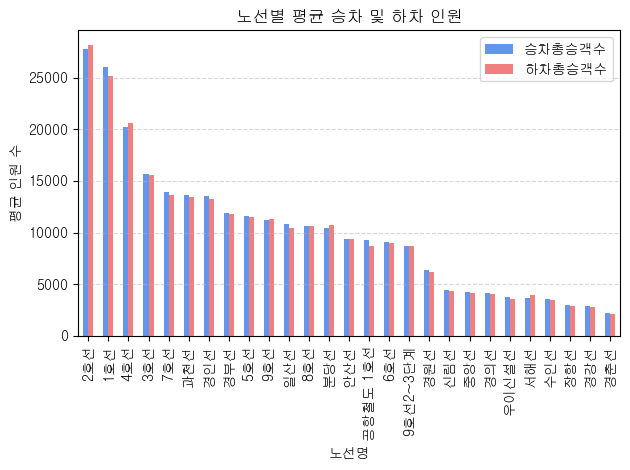

In [101]:
# 그래프 그리기
plt.figure(figsize=(12, 6))
line_mean.plot(kind='bar', stacked=False, color=['cornflowerblue', 'lightcoral'])


plt.title('노선별 평균 승차 및 하차 인원')
plt.ylabel('평균 인원 수')
plt.xlabel('노선명')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

2호선의 평균 승하차 승객수가 가장 높음
1호선, 2호선, 3호선, 4호선은 평균 승하차총승객수가 15000명을 넘음

In [102]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19139 entries, 0 to 19138
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   사용일자    19139 non-null  datetime64[ns]
 1   노선명     19139 non-null  object        
 2   역명      19139 non-null  object        
 3   승차총승객수  19139 non-null  int64         
 4   하차총승객수  19139 non-null  int64         
 5   등록일자    19139 non-null  datetime64[ns]
 6   요일      19139 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 1.0+ MB


In [ ]:
# 요일별 평균 승차 및 하차 인원 계산
weekday_mean = df.groupby('요일')[['승차총승객수', '하차총승객수']].mean().reset_index()
